<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/15_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Carregar o dataset a partir de um arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho do seu arquivo CSV
df = pd.read_csv('dataAlter.csv')

# Supondo que a coluna alvo (label) seja chamada 'target'
# Substitua 'target' pelo nome da sua coluna de saída
X = df.drop('Target', axis=1)
y = df['Target']

In [3]:

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Converter as labels para uma representação categórica (se necessário)
num_classes = len(y.unique())
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=10, verbose=0)

# Avaliar o modelo no conjunto de teste
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

# Treinar e avaliar outros modelos
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [10]:
results = {}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Adicionar os resultados da rede neural
results['Neural Network'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nn_classes),
    'Precision': precision_score(y_test, y_pred_nn_classes, average='weighted'),
    'Recall': recall_score(y_test, y_pred_nn_classes, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_nn_classes, average='weighted')
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Exibir os resultados
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")


Decision Tree:
  Accuracy: 0.6679
  Precision: 0.6676
  Recall: 0.6679
  F1 Score: 0.6677

KNN:
  Accuracy: 0.6943
  Precision: 0.6778
  Recall: 0.6943
  F1 Score: 0.6807

SVM:
  Accuracy: 0.7553
  Precision: 0.7441
  Recall: 0.7553
  F1 Score: 0.7379

Neural Network:
  Accuracy: 0.4812
  Precision: 0.3143
  Recall: 0.4812
  F1 Score: 0.3782


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Decision Tree:
  Accuracy: 0.6770
  Precision: 0.6794
  Recall: 0.6770
  F1 Score: 0.6780

KNN:
  Accuracy: 0.6943
  Precision: 0.6778
  Recall: 0.6943
  F1 Score: 0.6807

SVM:
  Accuracy: 0.7553
  Precision: 0.7441
  Recall: 0.7553
  F1 Score: 0.7379

Neural Network:
  Accuracy: 0.5173
  Precision: 0.3404
  Recall: 0.5173
  F1 Score: 0.4075


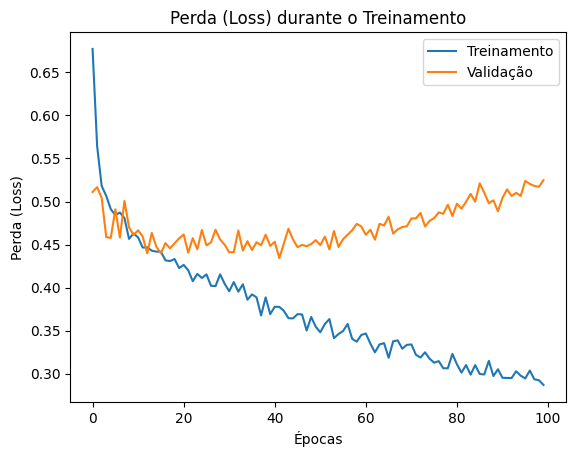

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset a partir de um arquivo CSV
df = pd.read_csv('dataAlter.csv')

# Supondo que a coluna alvo (label) seja chamada 'target'
X = df.drop('Target', axis=1)
y = df['Target']

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter as labels para uma representação categórica (se necessário)
num_classes = len(y.unique())
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Calcular os pesos das classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Definir a arquitetura da rede neural com dropout (Multi-layer Perceptron)
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adiciona dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adiciona dropout
model.add(Dense(num_classes, activation='softmax'))

# Compilar o modelo com um otimizador diferente
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo e armazenar o histórico, usando pesos de classe
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=16, verbose=0,
                    validation_data=(X_test_scaled, y_test_categorical), class_weight=class_weights_dict)

# Avaliar o modelo no conjunto de teste
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

# Treinar e avaliar outros modelos
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)  # Ajustado para calcular probabilidades
}

results = {}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Adicionar os resultados da rede neural
results['Neural Network'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nn_classes),
    'Precision': precision_score(y_test, y_pred_nn_classes, average='weighted'),
    'Recall': recall_score(y_test, y_pred_nn_classes, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_nn_classes, average='weighted')
}

# Exibir os resultados
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")

# Plotar a perda (loss) ao longo das épocas
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.legend()
plt.show()
